<a href="https://colab.research.google.com/github/trmckibben/CalomirisPritchett_data/blob/master/Copy_of_Copy_of_Untitled5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [62]:
import pandas as pa
import numpy as np

data = pa.read_csv('https://raw.githubusercontent.com/trmckibben/CalomirisPritchett_data/master/CalomirisPritchettdata.csv')

In [63]:
#fix name cause format is terrible
data["Sellers Name"] = data["Sellers Last Name"] + "," + " " + data["Sellers First Name"]
data["Buyers Name"] = data["Buyers Last Name"] + "," + " " + data["Buyers First Name"]
data["Notary Name"] = data["Notary Last Name"] + "," + " " + data["Notary First Name"]

In [64]:
data

,ID number,Conveyance,Page,Researcher,Notary First Name,Notary Last Name,Sales Date,Sellers First Name,Sellers Last Name,Sellers County of Origin,Sellers State of Origin,Representing Seller,Relationship to Seller,Buyers First Name,Buyers Last Name,Buyers County of Origin,Buyers State of Origin,Representing Buyer,Relationship to Buyer,Slave Name,Sex,Age,Color,Occupation,Family Relationship,Name Child 1,Sex Child 1,Age Child 1,Name Child 2,Sex Child 2,Age Child 2,Name Child 3,Sex Child 3,Age Child 3,Name Child 4,Sex Child 4,Age Child 4,Name Child 5,Sex Child 5,Age Child 5,Name Child 6,Sex Child 6,Age Child 6,Name Child 7,Sex Child 7,Age Child 7,Name Child 8,Sex Child 8,Age Child 8,Guaranteed,Notes on Guarantee,Number of Total Slaves,Number of Adult Slaves,Number of Child Slaves,Number of Prices,Price,Payment Method,Payment flag,DUMMY credit,Down Payment,mthcred,Interest Rate,Discount Rate,predicted rate,Calculations,Ratio,PresentValue,DUMMY omission,Reason for Omission,Comments,DUMMY Estate Sale,Sellers Name,Buyers Name,Notary Name
0,1,70,348,MS,John French,Coffey,10/6/1856,Benjamin,Screws,.,AL,James Whitfield Bozeman,Agent,Maria,Hopson,.,.,.,.,Shadrack,M,40,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,1,1,0,1,650,Cash,NaN,0,NaN,NaN,NaN,0.00602698,0.07477,NaN,NaN,NaN,0,NaN,NaN,NaN,"Screws, Benjamin","Hopson, Maria","Coffey, John French"
1,2,70,349,MS,William,Shannon,10/7/1856,Santiago,Galseran,New Orleans,LA,.,.,Peyton N.,Reynolds,New Orleans,LA,.,.,Jane,F,44,Negro,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,1,1,0,1,550,Cash,NaN,0,NaN,NaN,NaN,0.00602698,0.07477,NaN,NaN,NaN,0,NaN,NaN,NaN,"Galseran, Santiago","Reynolds, Peyton N.","Shannon, William"
2,3,70,351,MS,Edward George,Gottschalk,10/1/1856,Pierre,Macou,New Orleans,LA,Jean Louis Moinet,Joint Seller,Heloise,Bagneris,New Orleans,LA,.,.,Helen,F,24,Negro,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,1,1,0,1,1000,Cash,NaN,0,NaN,NaN,NaN,0.00602698,0.07477,NaN,NaN,NaN,0,NaN,NaN,NaN,"Macou, Pierre","Bagneris, Heloise","Gottschalk, Edward George"
3,4,70,352,MS,Paul Emile,Laresche,10/8/1856,Benjamin Franklin,Irby,Vanzand,TX,.,.,Francis,Dugue Jr.,Jefferson,LA,.,.,Jeff,M,23,Negro,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,1,1,0,1,1400,Cash,NaN,0,NaN,NaN,NaN,0.00602698,0.07477,NaN,NaN,NaN,0,NaN,NaN,NaN,"Irby, Benjamin Franklin","Dugue Jr., Francis","Laresche, Paul Emile"
4,5,70,352,MS,George,Rareshide,10/8/1856,Richard,Condon,New Orleans,LA,.,.,Anthony,O'Dowd,New Orleans,LA,.,.,John,M,12,Negro,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,1,1,0,1,700,Cash,NaN,0,NaN,NaN,NaN,0.00602698,0.07477,NaN,NaN,NaN,0,NaN,NaN,NaN,"Condon, Richard","O'Dowd, Anthony","Rareshide, George"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14708,15321,87,265,KRZC,Amedee,Ducatel,8/3/1861,Nywatt C.,Cutler,Jefferson,LA,.,.,Matthew Jules,Bujac,New Orleans,LA,.,.,Thomassine,F,25,Mulatto,.,Mother of 1 Child,Ernest,M,8,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,2,1,1,1,1100,Cash,NaN,0,NaN,NaN,NaN,0.00602698,0.07477,NaN,NaN,NaN,0,NaN,NaN,NaN,"Cutler, Nywatt C.","Bujac, Matthew Jules","Ducatel, Amedee"
14709,15370,87,332,KRZC,Adolphe,Mazareau,5/7/1861,John G.,Chadwick,New Orleans,LA,.,.,Sarah Ann,Chadwick,New Orleans,LA,.,.,Lucinda,F,24,Negro,.,Mother of 1 Child,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,Yes,Fully guaranteed,3,3,0,1,1600,Cash and Credit,200 paid cash with a note for 1400 due in 2 ye...,1,200,24,0.08,0.006054689,0.07512528,NaN,NaN,1600,1,OMIT: Group sale,NaN,NaN,"Chadwick, John G.","Chadwick, Sarah Ann","Mazareau, Adolphe"
14710,15371,87,332,KRZC,Adolphe,Mazareau,5/7/1861,John G.,Chadwick,New Orleans,LA,.,.,Sarah Ann,Chadwick,New Orleans,LA,.,.,Child,.,1,.,.,Child of Lucinda,.,.,.,.,.,.,.

In [70]:
data = pa.DataFrame(data.loc[data['DUMMY omission'] == 0])
data

,ID number,Conveyance,Page,Researcher,Notary First Name,Notary Last Name,Sales Date,Sellers First Name,Sellers Last Name,Sellers County of Origin,Sellers State of Origin,Representing Seller,Relationship to Seller,Buyers First Name,Buyers Last Name,Buyers County of Origin,Buyers State of Origin,Representing Buyer,Relationship to Buyer,Slave Name,Sex,Age,Color,Occupation,Family Relationship,Name Child 1,Sex Child 1,Age Child 1,Name Child 2,Sex Child 2,Age Child 2,Name Child 3,Sex Child 3,Age Child 3,Name Child 4,Sex Child 4,Age Child 4,Name Child 5,Sex Child 5,Age Child 5,Name Child 6,Sex Child 6,Age Child 6,Name Child 7,Sex Child 7,Age Child 7,Name Child 8,Sex Child 8,Age Child 8,Guaranteed,Notes on Guarantee,Number of Total Slaves,Number of Adult Slaves,Number of Child Slaves,Number of Prices,Price,Payment Method,Payment flag,DUMMY credit,Down Payment,mthcred,Interest Rate,Discount Rate,predicted rate,Calculations,Ratio,PresentValue,DUMMY omission,Reason for Omission,Comments,DUMMY Estate Sale,Sellers Name,Buyers Name,Notary Name
0,1,70,348,MS,John French,Coffey,10/6/1856,Benjamin,Screws,.,AL,James Whitfield Bozeman,Agent,Maria,Hopson,.,.,.,.,Shadrack,M,40,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,1,1,0,1,650,Cash,NaN,0,NaN,NaN,NaN,0.00602698,0.07477,NaN,NaN,NaN,0,NaN,NaN,NaN,"Screws, Benjamin","Hopson, Maria","Coffey, John French"
1,2,70,349,MS,William,Shannon,10/7/1856,Santiago,Galseran,New Orleans,LA,.,.,Peyton N.,Reynolds,New Orleans,LA,.,.,Jane,F,44,Negro,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,1,1,0,1,550,Cash,NaN,0,NaN,NaN,NaN,0.00602698,0.07477,NaN,NaN,NaN,0,NaN,NaN,NaN,"Galseran, Santiago","Reynolds, Peyton N.","Shannon, William"
2,3,70,351,MS,Edward George,Gottschalk,10/1/1856,Pierre,Macou,New Orleans,LA,Jean Louis Moinet,Joint Seller,Heloise,Bagneris,New Orleans,LA,.,.,Helen,F,24,Negro,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,1,1,0,1,1000,Cash,NaN,0,NaN,NaN,NaN,0.00602698,0.07477,NaN,NaN,NaN,0,NaN,NaN,NaN,"Macou, Pierre","Bagneris, Heloise","Gottschalk, Edward George"
3,4,70,352,MS,Paul Emile,Laresche,10/8/1856,Benjamin Franklin,Irby,Vanzand,TX,.,.,Francis,Dugue Jr.,Jefferson,LA,.,.,Jeff,M,23,Negro,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,1,1,0,1,1400,Cash,NaN,0,NaN,NaN,NaN,0.00602698,0.07477,NaN,NaN,NaN,0,NaN,NaN,NaN,"Irby, Benjamin Franklin","Dugue Jr., Francis","Laresche, Paul Emile"
4,5,70,352,MS,George,Rareshide,10/8/1856,Richard,Condon,New Orleans,LA,.,.,Anthony,O'Dowd,New Orleans,LA,.,.,John,M,12,Negro,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,1,1,0,1,700,Cash,NaN,0,NaN,NaN,NaN,0.00602698,0.07477,NaN,NaN,NaN,0,NaN,NaN,NaN,"Condon, Richard","O'Dowd, Anthony","Rareshide, George"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14701,15212,87,111,KRZC,Antoine,Abat,5/6/1861,John,Bangle,Lafayette,MS,Peyton H. Skipwidth,Attorney,Paul,Abat,New Orleans,LA,.,.,Tom,M,24,Mulatto,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,No,Guaranteed in title only,1,1,0,1,1000,Credit,One note payable in a year at 8% interest,1,0,12,0.08,0.006202525,0.07702264,NaN,NaN,1000,0,NaN,NaN,NaN,"Bangle, John","Abat, Paul","Abat, Antoine"
14702,15221,87,118,KRZC,Octave,De Armas,8/29/1861,Gustave,Moras,.,.,Elizabeth Bruin,Executor of the Estate,Francois,Duque,Jefferson,LA,.,.,William,M,28,Creole Negro,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,1,1,0,1,800,Cash and Credit,400 paid cash with the balance put into a note...,1,400,6,0.08,0.005790818,0.07174632,NaN,NaN,800,0,NaN,NaN,1.0,"Moras, Gustave","Duque, Francois","De Armas, Octave"
14704,15268,87,201,KRZC,.,.,4/4/1861,V. W.,Hutt,Little Rock,AR,.,.,Isaac,Bloom,New Orleans,LA,.,.,Enock Black,M,35,Negro,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,

In [71]:
#getting all of the column names
cols = list(data.columns.values)

In [72]:
cols

['ID number',
 'Conveyance',
 'Page',
 'Researcher',
 'Notary First Name',
 'Notary Last Name',
 'Sales Date',
 'Sellers First Name',
 'Sellers Last Name',
 'Sellers County of Origin',
 'Sellers State of Origin',
 'Representing Seller',
 'Relationship to Seller',
 'Buyers First Name',
 'Buyers Last Name',
 'Buyers County of Origin',
 'Buyers State of Origin',
 'Representing Buyer',
 'Relationship to Buyer',
 'Slave Name',
 'Sex',
 'Age',
 'Color',
 'Occupation',
 'Family Relationship',
 'Name Child 1',
 'Sex Child 1',
 'Age Child 1',
 'Name Child 2',
 'Sex Child 2',
 'Age Child 2',
 'Name Child 3',
 'Sex Child 3',
 'Age Child 3',
 'Name Child 4',
 'Sex Child 4',
 'Age Child 4',
 'Name Child 5',
 'Sex Child 5',
 'Age Child 5',
 'Name Child 6',
 'Sex Child 6',
 'Age Child 6',
 'Name Child 7',
 'Sex Child 7',
 'Age Child 7',
 'Name Child 8',
 'Sex Child 8',
 'Age Child 8',
 'Guaranteed',
 'Notes on Guarantee',
 'Number of Total Slaves',
 'Number of Adult Slaves',
 'Number of Child Slaves'

In [73]:
#make the sex column uniform with possible values of 'M', 'F', and 'U'
data.loc[(data.Sex == 'M '),'Sex']='M'
data.loc[(data.Sex == 'F '),'Sex']='F'
data.loc[(data.Sex == 'F       '),'Sex']='F'
data.loc[(data.Sex == '.'),'Sex']=np.NaN
data.loc[pa.isna(data.Sex),'Sex'] = 'U'
data.Sex.unique()

array(['M', 'F', 'U'], dtype=object)

In [74]:
#fix their weird spacing for repeating values Also, "Griff" is a slave not entirely of African descent but was a number of different ethnicities
data.loc[(data.Color == 'Negro '),'Color']='Negro'
data.loc[(data.Color == 'Dark'),'Color']='Negro'
data.loc[(data.Color == 'Bright Mulatto'),'Color']='Light Mulatto'
data.loc[(data.Color == 'Fair Mulatto'),'Color']='Light Mulatto'
data.loc[(data.Color == 'Quarteroon'),'Color']='Griff'
data.loc[(data.Color == 'Bright Color'),'Color']='Light'
data.loc[(data.Color == 'Dark Orange, Griff '),'Color']='Dark Orange, Griff'
data.loc[(data.Color == '. '),'Color']='.'
data.loc[(data.Color == '.'),'Color']='UC'
data.loc[pa.isna(data.Color),'Color'] = 'UC'
colorLabels = data.Color.unique()

In [75]:
data.Color.unique()

array(['UC', 'Negro', 'Mulatto', 'Griff', 'Dark Griff', 'Creole Negro',
       'Black', 'Yellow', 'Creole Mulatto', 'Copper', 'Creole',
       'Dark Negro', 'Light Mulatto', 'Dark Mulatto', 'Brown',
       'Light Griff', 'Mulatto, Griff', 'Light Negro', 'Light',
       'Light Brown', 'Albino, Negro', 'Dark Orange, Griff', 'Chestnut',
       'Yellow, Griff', 'Black Negro', 'Dark Copper', 'Griff Creole'],
      dtype=object)

In [76]:
#assigning numerical values to Color
data.loc[(data.Color == 'UC'),'Color']=1
data.loc[(data.Color == 'Colored'),'Color']=2
data.loc[(data.Color == 'Albino, Negro'),'Color']=3
data.loc[(data.Color == 'Light'),'Color']=4
data.loc[(data.Color == 'Light Griff'),'Color']=5
data.loc[(data.Color == 'Griff'),'Color']=6
data.loc[(data.Color == 'Yellow, Griff'),'Color']=7
data.loc[(data.Color == 'Yellow'),'Color']=8
data.loc[(data.Color == 'Mulatto, Griff'),'Color']=9
data.loc[(data.Color == 'Light Mulatto'),'Color']=10
data.loc[(data.Color == 'Copper'),'Color']=11
data.loc[(data.Color == 'Griff Creole'),'Color']=12
data.loc[(data.Color == 'Creole Mulatto'),'Color']=13
data.loc[(data.Color == 'Creole'),'Color']=14
data.loc[(data.Color == 'Mulatto'),'Color']=15
data.loc[(data.Color == 'Dark Griff'),'Color']=16
data.loc[(data.Color == 'Dark Orange, Griff'),'Color']=17
data.loc[(data.Color == 'Dark Copper'),'Color']=18
data.loc[(data.Color == 'Dark Mulatto'),'Color']=19
data.loc[(data.Color == 'Light Brown'),'Color']=20
data.loc[(data.Color == 'Chestnut'),'Color']=21
data.loc[(data.Color == 'Brown'),'Color']=22
data.loc[(data.Color == 'Light Negro'),'Color']=23
data.loc[(data.Color == 'Creole Negro'),'Color']=24
data.loc[(data.Color == 'Negro'),'Color']=25
data.loc[(data.Color == 'Dark Negro'),'Color']=26
data.loc[(data.Color == 'Black Negro'),'Color']=27
data.loc[(data.Color == 'Light Black'),'Color']=28
data.loc[(data.Color == 'Black'),'Color']=29


colorLabels = data.Color.unique()
data.Color.unique()

array([1, 25, 15, 6, 16, 24, 29, 8, 13, 11, 14, 26, 10, 19, 22, 5, 9, 23,
       4, 20, 3, 17, 21, 7, 27, 18, 12], dtype=object)

'UC', 'Colored', 'Albino, Negro', 'Light', 'Light Griff', 'Griff'/'Quarteroon', 'Yellow, Griff', 'Yellow', 'Mulatto, Griff', 'Light Mulatto', 'Copper', 'Griff Creole', 'Creole Mulatto', 'Creole', 'Mulatto',  'Dark Griff', 'Dark Orange, Griff', 'Dark Copper', 'Dark Mulatto', 'Light Brown', 'Chestnut', 'Brown', 'Light Negro', 'Creole Negro', 'Negro', 'Dark Negro', 'Black Negro', 'Light Black', 'Black'

In [77]:
#First look at slaves that were sold by themselves
singles = pa.DataFrame(data.loc[data['Number of Total Slaves'] == 1])
singles

,ID number,Conveyance,Page,Researcher,Notary First Name,Notary Last Name,Sales Date,Sellers First Name,Sellers Last Name,Sellers County of Origin,Sellers State of Origin,Representing Seller,Relationship to Seller,Buyers First Name,Buyers Last Name,Buyers County of Origin,Buyers State of Origin,Representing Buyer,Relationship to Buyer,Slave Name,Sex,Age,Color,Occupation,Family Relationship,Name Child 1,Sex Child 1,Age Child 1,Name Child 2,Sex Child 2,Age Child 2,Name Child 3,Sex Child 3,Age Child 3,Name Child 4,Sex Child 4,Age Child 4,Name Child 5,Sex Child 5,Age Child 5,Name Child 6,Sex Child 6,Age Child 6,Name Child 7,Sex Child 7,Age Child 7,Name Child 8,Sex Child 8,Age Child 8,Guaranteed,Notes on Guarantee,Number of Total Slaves,Number of Adult Slaves,Number of Child Slaves,Number of Prices,Price,Payment Method,Payment flag,DUMMY credit,Down Payment,mthcred,Interest Rate,Discount Rate,predicted rate,Calculations,Ratio,PresentValue,DUMMY omission,Reason for Omission,Comments,DUMMY Estate Sale,Sellers Name,Buyers Name,Notary Name
0,1,70,348,MS,John French,Coffey,10/6/1856,Benjamin,Screws,.,AL,James Whitfield Bozeman,Agent,Maria,Hopson,.,.,.,.,Shadrack,M,40,1,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,1,1,0,1,650,Cash,NaN,0,NaN,NaN,NaN,0.00602698,0.07477,NaN,NaN,NaN,0,NaN,NaN,NaN,"Screws, Benjamin","Hopson, Maria","Coffey, John French"
1,2,70,349,MS,William,Shannon,10/7/1856,Santiago,Galseran,New Orleans,LA,.,.,Peyton N.,Reynolds,New Orleans,LA,.,.,Jane,F,44,25,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,1,1,0,1,550,Cash,NaN,0,NaN,NaN,NaN,0.00602698,0.07477,NaN,NaN,NaN,0,NaN,NaN,NaN,"Galseran, Santiago","Reynolds, Peyton N.","Shannon, William"
2,3,70,351,MS,Edward George,Gottschalk,10/1/1856,Pierre,Macou,New Orleans,LA,Jean Louis Moinet,Joint Seller,Heloise,Bagneris,New Orleans,LA,.,.,Helen,F,24,25,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,1,1,0,1,1000,Cash,NaN,0,NaN,NaN,NaN,0.00602698,0.07477,NaN,NaN,NaN,0,NaN,NaN,NaN,"Macou, Pierre","Bagneris, Heloise","Gottschalk, Edward George"
3,4,70,352,MS,Paul Emile,Laresche,10/8/1856,Benjamin Franklin,Irby,Vanzand,TX,.,.,Francis,Dugue Jr.,Jefferson,LA,.,.,Jeff,M,23,25,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,1,1,0,1,1400,Cash,NaN,0,NaN,NaN,NaN,0.00602698,0.07477,NaN,NaN,NaN,0,NaN,NaN,NaN,"Irby, Benjamin Franklin","Dugue Jr., Francis","Laresche, Paul Emile"
4,5,70,352,MS,George,Rareshide,10/8/1856,Richard,Condon,New Orleans,LA,.,.,Anthony,O'Dowd,New Orleans,LA,.,.,John,M,12,25,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,1,1,0,1,700,Cash,NaN,0,NaN,NaN,NaN,0.00602698,0.07477,NaN,NaN,NaN,0,NaN,NaN,NaN,"Condon, Richard","O'Dowd, Anthony","Rareshide, George"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14696,15201,87,90,KRZC,Jean,Agaisse,8/29/1861,Jean Gabriel,Mortimer,New Orleans,LA,.,.,Octavie,Leesage,New Orleans,LA,.,.,Eliza,F,52,6,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,Partial,"Titly Only, Sickly",1,1,0,1,80,Cash,NaN,0,NaN,NaN,NaN,0.00602698,0.07477,NaN,NaN,NaN,0,NaN,Buyer is FPC,NaN,"Mortimer, Jean Gabriel","Leesage, Octavie","Agaisse, Jean"
14701,15212,87,111,KRZC,Antoine,Abat,5/6/1861,John,Bangle,Lafayette,MS,Peyton H. Skipwidth,Attorney,Paul,Abat,New Orleans,LA,.,.,Tom,M,24,15,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,No,Guaranteed in title only,1,1,0,1,1000,Credit,One note payable in a year at 8% interest,1,0,12,0.08,0.006202525,0.07702264,NaN,NaN,1000,0,NaN,NaN,NaN,"Bangle, John","Abat, Paul","Abat, Antoine"
14702,15221,87,118,KRZC,Octave,De Armas,8/29/1861,Gustave,Moras,.,.,Elizabeth Bruin,Executor of the Estate,Francois,Duque,Jefferson,LA,.,.,William,M,28,24,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,1,1,0,1,800,Cash and Credit,40

Look at Single Adults sold by themselves.

In [78]:
#now look at the adults of these
singleadults = pa.DataFrame(singles.loc[singles['Number of Adult Slaves'] == 1])

In [79]:
singleadults = singleadults[['Sex', 'Age', 'Color', 'Price']]
singleadults

,Sex,Age,Color,Price
0,M,40,1,650
1,F,44,25,550
2,F,24,25,1000
3,M,23,25,1400
4,M,12,25,700
...,...,...,...,...
14696,F,52,6,80
14701,M,24,15,1000
14702,M,28,24,800
14704,M,35,25,950


In [80]:
singleadults = singleadults[~(singleadults['Price'] == '.')]
singleadults = singleadults[~(singleadults['Age']=='.')]

In [81]:
singleadults = singleadults[singleadults['Price'].notna()]

In [82]:
singleadults

,Sex,Age,Color,Price
0,M,40,1,650
1,F,44,25,550
2,F,24,25,1000
3,M,23,25,1400
4,M,12,25,700
...,...,...,...,...
14696,F,52,6,80
14701,M,24,15,1000
14702,M,28,24,800
14704,M,35,25,950


In [83]:
singleadults.loc[(singleadults['Price']== '233.33 1/3'),'Price']=233.33

Color vs. price divided by sex

In [84]:
singleladies = pa.DataFrame(singleadults.loc[singleadults['Sex'] == 'F'])
singleladdies = pa.DataFrame(singleadults.loc[singleadults['Sex'] == 'M'])
singleothers = pa.DataFrame(singleadults.loc[singleadults['Sex'] == 'U'])

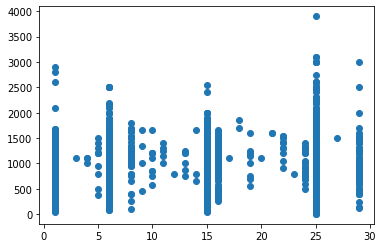

In [90]:
#plot color wrt price
import matplotlib.pyplot as plt
df = pa.concat([singleadults['Color'], singleadults['Price']], axis=1)
df['Color'] = pa.to_numeric(df['Color'])
df['Price'] = pa.to_numeric(df['Price'])
#df = df.loc[df['Price'] != max(df['Price'])]

plt.scatter(df['Color'], df['Price'])


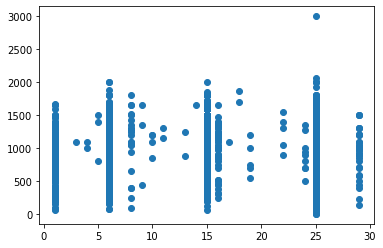

In [91]:
import matplotlib.pyplot as plt
df = pa.concat([singleladies['Color'], singleladies['Price']], axis=1)
df['Color'] = pa.to_numeric(df['Color'])
df['Price'] = pa.to_numeric(df['Price'])
#df = df.loc[df['Price'] != max(df['Price'])]

plt.scatter(df['Color'], df['Price'])

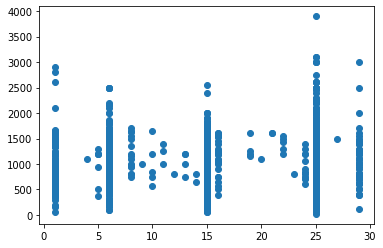

In [92]:
import matplotlib.pyplot as plt
df = pa.concat([singleladdies['Color'], singleladdies['Price']], axis=1)
df['Color'] = pa.to_numeric(df['Color'])
df['Price'] = pa.to_numeric(df['Price'])
#df = df.loc[df['Price'] != max(df['Price'])]

plt.scatter(df['Color'], df['Price'])

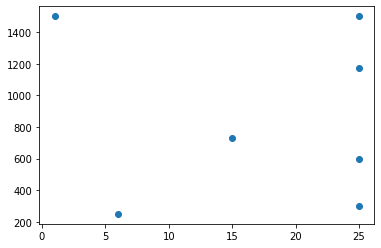

In [93]:
import matplotlib.pyplot as plt
df = pa.concat([singleothers['Color'], singleothers['Price']], axis=1)
df['Color'] = pa.to_numeric(df['Color'])
df['Price'] = pa.to_numeric(df['Price'])
#df = df.loc[df['Price'] != max(df['Price'])]

plt.scatter(df['Color'], df['Price'])

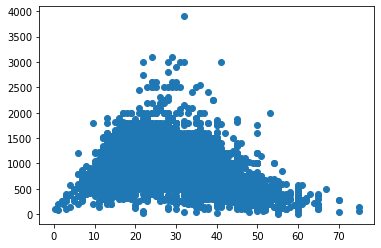

In [94]:
import matplotlib.pyplot as plt
df = pa.concat([singleadults['Age'], singleadults['Price']], axis=1)
df['Age'] = pa.to_numeric(df['Age'])
df['Price'] = pa.to_numeric(df['Price'])
#df = df.loc[df['Price'] != max(df['Price'])]

plt.scatter(df['Age'], df['Price'])

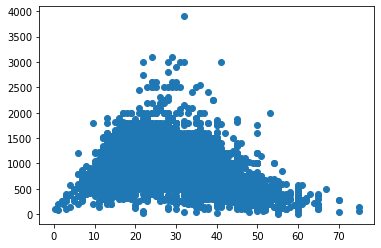

In [95]:
#I think this is what you want for that code above
import matplotlib.pyplot as plt
df = pa.concat([singleadults['Age'], singleadults['Price']], axis=1)
df['Age'] = pa.to_numeric(df['Age'])
df['Price'] = pa.to_numeric(df['Price'])
#df = df.loc[df['Price'] != max(df['Price'])]

plt.scatter(df['Age'], df['Price'])

Age vs price divided by sex

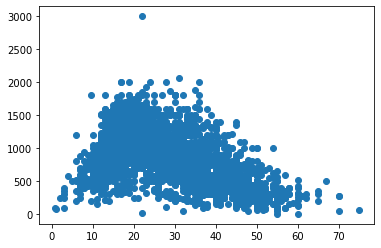

In [96]:
import matplotlib.pyplot as plt
df = pa.concat([singleladies['Age'], singleladies['Price']], axis=1)
df['Age'] = pa.to_numeric(df['Age'])
df['Price'] = pa.to_numeric(df['Price'])
#df = df.loc[df['Price'] != max(df['Price'])]

plt.scatter(df['Age'], df['Price'])

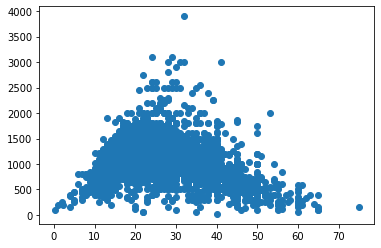

In [97]:
import matplotlib.pyplot as plt
df = pa.concat([singleladdies['Age'], singleladdies['Price']], axis=1)
df['Age'] = pa.to_numeric(df['Age'])
df['Price'] = pa.to_numeric(df['Price'])
#df = df.loc[df['Price'] != max(df['Price'])]

plt.scatter(df['Age'], df['Price'])

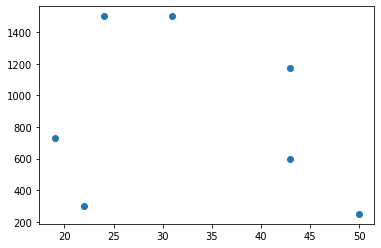

In [98]:
import matplotlib.pyplot as plt
df = pa.concat([singleothers['Age'], singleothers['Price']], axis=1)
df['Age'] = pa.to_numeric(df['Age'])
df['Price'] = pa.to_numeric(df['Price'])
#df = df.loc[df['Price'] != max(df['Price'])]

plt.scatter(df['Age'], df['Price'])

In [ ]:
from sklearn import preprocessing

lb = preprocessing.LabelBinarizer()

#lb.fit_transform(singleadults.Sex)
sex = np.array(singleadults.Sex)
#sex = np.append(sex,np.array(singleadults.Color))
sexbi = lb.fit_transform(sex)
sexbi[0,:]

array([0, 1, 0])

In [ ]:
color = np.array(singleadults.Color)


colorbi = lb.fit_transform(color)
singleadults.Color.unique()
colorbi

array([[0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0]])

In [ ]:
colorbi.shape

(6958, 31)

In [ ]:
sexbi.shape

(6958, 3)

In [ ]:
colorLabels

array(['UC', 'Negro', 'Mulatto', 'Griff', 'Dark Griff', 'Light Black',
       'Black', 'Creole Negro', 'Quarteroon', 'Yellow', 'Colored',
       'Creole Mulatto', 'Copper', 'Creole', 'Dark Negro',
       'Light Mulatto', 'Bright Mulatto', 'Light Griff', 'Dark',
       'Dark Mulatto', 'Brown', 'Dark Copper', 'Mulatto, Griff',
       'Light Negro', 'Fair Mulatto', 'Bright Color', 'Light',
       'Light Brown', 'Albino, Negro', 'Dark Orange, Griff ', 'Chestnut',
       'Yellow, Griff', 'Black Negro', 'Griff Creole'], dtype=object)

In [ ]:
combine = np.append(sexbi,colorbi,axis = 1)
combine.shape

(6958, 34)

In [ ]:
y = np.array(singleadults.Price)
age = np.array([singleadults.Age])
comb = np.concatenate((combine,age.T),axis = 1)
comb.shape

(6958, 35)

In [ ]:
from sklearn.linear_model import LinearRegression
#what is y supposed to be, price?
lr = LinearRegression().fit(comb,y)

lr.coef_

array([ 7.47143904e+08,  7.47144098e+08,  7.47144243e+08,  5.22047378e+12,
        5.22047378e+12,  5.22047378e+12,  5.22047378e+12,  5.22047378e+12,
        5.22047378e+12,  5.22047378e+12,  5.22047378e+12,  5.22047378e+12,
        5.22047378e+12,  5.22047378e+12,  5.22047378e+12,  5.22047378e+12,
        5.22047378e+12,  5.22047378e+12,  5.22047378e+12,  5.22047378e+12,
        5.22047378e+12,  5.22047378e+12,  5.22047378e+12,  5.22047378e+12,
        5.22047378e+12,  5.22047378e+12,  5.22047378e+12,  5.22047378e+12,
        5.22047378e+12,  5.22047378e+12,  5.22047378e+12,  5.22047378e+12,
        5.22047378e+12,  5.22047378e+12, -1.02348409e+01])

In [ ]:
from sklearn.linear_model import Lasso
lasso = Lasso().fit(comb,y)

lasso.coef_

array([-189.82127487,    0.        ,    0.        ,    0.        ,
         -0.        ,    0.        ,   -0.        ,    0.        ,
          0.        ,    0.        ,   -0.        ,   -0.        ,
         -0.        ,    0.        ,    0.        ,    0.        ,
         -0.        ,    0.        ,    0.        ,    0.        ,
         16.88134812,   -0.        ,   -0.        ,   -0.        ,
         -0.        ,   -0.        ,    0.        ,   -0.        ,
         -9.36406208,    0.        ,   12.29617409,   -0.        ,
       -125.33752865,    0.        ,  -10.20737177])

the first 31 are correlation with color, then the next 3 are sex, the last one is age. predicting price.

/usr/local/lib/python3.6/dist-packages/seaborn/matrix.py:311: UserWarning: Attempting to set identical bottom == top == 0 results in singular transformations; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))
/usr/local/lib/python3.6/dist-packages/seaborn/matrix.py:311: UserWarning: Attempting to set identical left == right == 0 results in singular transformations; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))


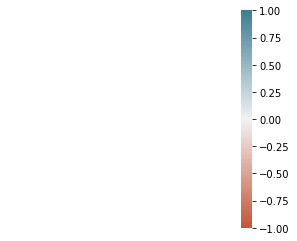

In [ ]:
#how to heat map
import seaborn as sns

corr = singleadults.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [ ]:
# make dataframe with ID number, sales date, representing seller, slave name, sex, age, color, price
dataless = data[['Number of Total Slaves', 'Number of Adult Slaves', 'Number of Child Slaves', 'Name Child 1','Sex Child 1','Age Child 1','Name Child 2','Sex Child 2','Age Child 2','Name Child 3','Sex Child 3','Age Child 3','Name Child 4','Sex Child 4','Age Child 4','Name Child 5','Sex Child 5','Age Child 5','Name Child 6','Sex Child 6','Age Child 6','Name Child 7','Sex Child 7','Age Child 7','Name Child 8','Sex Child 8','Age Child 8', 'Sex', 'Age', 'Color', 'Price']]

In [ ]:
#I want to separate the slaves with children from the slaves without children.
dataless['Number of Adult Slaves'].unique()


array([  1,   2,   3,   7,   4,  45,   0,   5,  11,  17,   6,  10,  19,
         8,  21,  23,  30,  18,  12,  28,  14,  33, 147,  13,  24,  16,
        34,   9,  27,  20,  25,  38,  31,  15,  32,  41,  26, 115,  49,
        53,  58,  55,  22,  72,  29,  82])

In [ ]:
dataless['Number of Child Slaves'].unique()

array([ 0,  2,  1,  7,  3,  4,  6,  5, 10, 11,  9,  8])

Okay so it looks like i will need to divide the end price by the number of adult slaves (for the cases without children). So separate the entries with children from the ones without, divide the price by the value in the 'number of adult slaves' column.

In [ ]:
#dataframe of only adults, their sex, age, price, number of them, call this onlyadults.
onlyadults = pa.DataFrame(dataless.loc[dataless['Number of Child Slaves'] == 0])
onlyadults

,Number of Total Slaves,Number of Adult Slaves,Number of Child Slaves,Name Child 1,Sex Child 1,Age Child 1,Name Child 2,Sex Child 2,Age Child 2,Name Child 3,Sex Child 3,Age Child 3,Name Child 4,Sex Child 4,Age Child 4,Name Child 5,Sex Child 5,Age Child 5,Name Child 6,Sex Child 6,Age Child 6,Name Child 7,Sex Child 7,Age Child 7,Name Child 8,Sex Child 8,Age Child 8,Sex,Age,Color,Price
0,1,1,0,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,M,40,.,650
1,1,1,0,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,F,44,Negro,550
2,1,1,0,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,F,24,Negro,1000
3,1,1,0,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,M,23,Negro,1400
4,1,1,0,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,M,12,Negro,700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14707,3,3,0,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,M,50,Negro,NaN
14709,3,3,0,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,F,24,Negro,1600
14710,3,3,0,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,1,.,NaN
14711,3,3,0,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,F,46,Negro,NaN


In [ ]:
#i don't need any of child columns so get rid of those
onlyadults = onlyadults[['Number of Adult Slaves', 'Sex', 'Age', 'Color', 'Price']]
onlyadults

,Number of Adult Slaves,Sex,Age,Color,Price
0,1,M,40,.,650
1,1,F,44,Negro,550
2,1,F,24,Negro,1000
3,1,M,23,Negro,1400
4,1,M,12,Negro,700
...,...,...,...,...,...
14707,3,M,50,Negro,NaN
14709,3,F,24,Negro,1600
14710,3,.,1,.,NaN
14711,3,F,46,Negro,NaN


In [ ]:
#some of the rows have NaN values for price, which is needed for project so, throw those out.
onlyadults = onlyadults[onlyadults['Price'].notna()]

In [ ]:
#check all values in sex column
onlyadults.Sex.unique()

array(['M', 'F', nan, '.', 'F ', 'M ', 'F       '], dtype=object)

In [ ]:
#cry because array(['M', 'F', nan, '.', 'F ', 'M ', 'F       '], dtype=object) and why would you do that? 
#Then fix the values so they are uniform for god's sake
onlyadults.loc[(onlyadults.Sex == 'M '),'Sex']='M'
onlyadults.loc[(onlyadults.Sex == 'F '),'Sex']='F'
onlyadults.loc[(onlyadults.Sex == 'F       '),'Sex']='F'
onlyadults.loc[(onlyadults.Sex == '.'),'Sex']=np.NaN
onlyadults.loc[pa.isna(onlyadults.Sex),'Sex'] = 'U'
onlyadults.Sex.unique()


array(['M', 'F', 'U'], dtype=object)

In [ ]:
#Find out our possible Colors.
onlyadults.Color.unique()

array(['.', 'Negro', 'Mulatto', 'Griff', 'Dark Griff', 'Light Black',
       'Black', 'Creole Negro', 'Yellow', 'Quarteroon', 'Creole Mulatto',
       'Copper', 'Dark Negro', 'Light Mulatto', 'Dark', 'Dark Mulatto',
       'Brown', 'Light Griff', 'Dark Copper', 'Creole', 'Mulatto, Griff',
       'Light Negro', 'Fair Mulatto', 'Bright Mulatto', 'Light', nan,
       'Light Brown', 'Albino, Negro', 'Dark Orange, Griff ', 'Chestnut',
       'Negro ', 'Black Negro', '. ', 'Griff Creole'], dtype=object)

In [ ]:
#fix their weird spacing for repeating values Also, "Griff" is a slave not entirely of African descent but was a number of different ethnicities
onlyadults.loc[(onlyadults.Color == 'Negro '),'Color']='Negro'
onlyadults.loc[(onlyadults.Color == '. '),'Color']='.'
onlyadults.loc[(onlyadults.Color == '.'),'Color']='UC'
onlyadults.loc[pa.isna(onlyadults.Color),'Color'] = 'UC'
colorLabels = onlyadults.Color.unique()

In [ ]:
Quarteroon = onlyadults['Color'].str.contains('Quarteroon')
ttlQuarteroon = Quarteroon.sum()
Black = onlyadults['Color'].str.contains('Black')
ttlBlack = Black.sum()
Mulatto = onlyadults['Color'].str.contains('Mulatto')
ttlMulatto = Mulatto.sum()
print(ttlQuarteroon, ttlBlack, ttlMulatto)

24 270 1252


In [ ]:
onlyadults

,Number of Adult Slaves,Sex,Age,Color,Price
0,1,M,40,UC,650
1,1,F,44,Negro,550
2,1,F,24,Negro,1000
3,1,M,23,Negro,1400
4,1,M,12,Negro,700
...,...,...,...,...,...
14702,1,M,28,Creole Negro,800
14704,1,M,35,Negro,950
14705,3,M,50,Negro,650
14709,3,F,24,Negro,1600


In [ ]:
#I'd suggest the code  This has to be done before all your transformations though!!
onlyadults = onlyadults[~(onlyadults['Price'] == '.')]
onlyadults = onlyadults[~(onlyadults['Age']=='.')]

In [ ]:
#need to have each adult slave as one instance, so replace the one listing that has multiple adults with n adults with the same sex, age, color, and divide the price by n.
#for value in onlyadults['Number of Adult Slaves] =/ 1, 

In [ ]:
onlyadults.loc[(onlyadults['Price']== '233.33 1/3'),'Price']=233.33

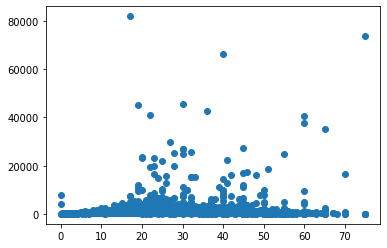

In [ ]:
#I think this is what you want for that code above
#dataless[dataless['Sex']=='M']
import matplotlib.pyplot as plt
df = pa.concat([onlyadults['Age'], onlyadults['Price']], axis=1)
df['Age'] = pa.to_numeric(df['Age'])
df['Price'] = pa.to_numeric(df['Price'])
plt.scatter(df['Age'], df['Price'])


In [ ]:
from sklearn import preprocessing

lb = preprocessing.LabelBinarizer()

#lb.fit_transform(dataless.Sex)
sex = np.array(dataless.Sex)
#sex = np.append(sex,np.array(dataless.Color))
sexbi = lb.fit_transform(sex)
sexbi[0,:]

array([0, 1, 0])

In [ ]:
color = np.array(dataless.Color)


colorbi = lb.fit_transform(color)
dataless.Color.unique()
colorbi

array([[0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 0]])

In [ ]:
colorLabels

array(['UC', 'Negro', 'Mulatto', 'Griff', 'Dark Griff', 'Light Black',
       'Black', 'Creole Negro', 'Yellow', 'Quarteroon', 'Colored',
       'Creole Mulatto', 'Copper', 'Creole', 'Dark Negro',
       'Light Mulatto', 'Bright Mulatto', 'Dark', 'Dark Mulatto', 'Brown',
       'Light Griff', 'Dark Copper', 'Mulatto, Griff', 'Light Negro',
       'Fair Mulatto', 'Bright Color', 'Light', 'Light Brown',
       'Albino, Negro', 'Dark Orange, Griff ', 'Chestnut',
       'Yellow, Griff', 'Black Negro', 'Griff Creole'], dtype=object)

In [ ]:
combine = np.append(sexbi,colorbi,axis = 1)
combine.shape

(12034, 37)

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html 

In [ ]:
#1 Is there a correlation for price and color?
#2 Is there a correlation for sex and price?
#3 is there a correlation for age and price?

In [ ]:
y = np.array(dataless.Price)
age = np.array([dataless.Age])
comb = np.concatenate((combine,age.T),axis = 1)
comb.shape

(12034, 38)

In [ ]:
from sklearn.linear_model import LinearRegression
#what is y supposed to be, price?
lr = LinearRegression().fit(comb,y)

lr.coef_

array([-1.94529828e+08, -1.94529531e+08, -1.94529785e+08,  4.89599383e+12,
        4.89599383e+12,  4.89599383e+12,  4.89599383e+12,  4.89599383e+12,
        4.89599383e+12,  4.89599383e+12,  4.89599383e+12,  4.89599383e+12,
        4.89599383e+12,  4.89599383e+12,  4.89599383e+12,  4.89599383e+12,
        4.89599383e+12,  4.89599383e+12,  4.89599383e+12,  4.89599383e+12,
        4.89599383e+12,  4.89599383e+12,  4.89599383e+12,  4.89599383e+12,
        4.89599383e+12,  4.89599383e+12,  4.89599383e+12,  4.89599383e+12,
        4.89599383e+12,  4.89599383e+12,  4.89599383e+12,  4.89599383e+12,
        4.89599383e+12,  4.89599383e+12,  4.89599383e+12,  4.89599383e+12,
        4.89599383e+12,  4.81973878e+00])

In [ ]:
from sklearn.linear_model import Lasso
lasso = Lasso().fit(comb,y)

lasso.coef_

array([-58.35139097, 236.68895994,  -0.        ,  -0.        ,
       102.469377  ,   0.        ,   0.        ,  -0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
        -0.        ,  -0.        ,  -0.        ,  -0.        ,
         0.        ,  -0.        ,  -0.        ,   0.        ,
         0.        ,  -0.        ,  -0.        ,  -0.        ,
        -0.        ,  -0.        ,  -0.        ,  -0.        ,
        -0.        ,  -0.        , -26.1945745 ,   0.        ,
        34.22319746,  -0.        , 498.60807289,   0.        ,
        -0.        ,   4.8364487 ])

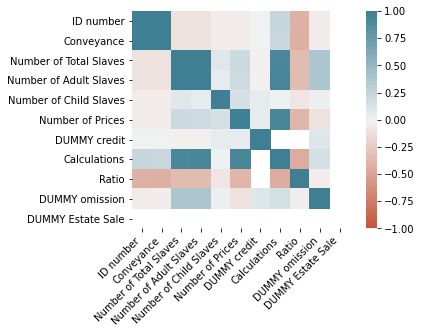

In [ ]:
import seaborn as sns

corr = data.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [ ]:
dataless['Age'] = dataless['Age'].astype(float)
dataless['Price'] = dataless['Price'].astype(float)

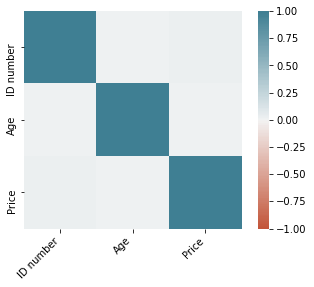

In [ ]:
corr = dataless.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);